#### This notebook is used for loading images and generating 320 x 320 tiles. Each generated tile is saved using image ID and tile ID into a dedicated folder.

In [1]:
# Import required libraries
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

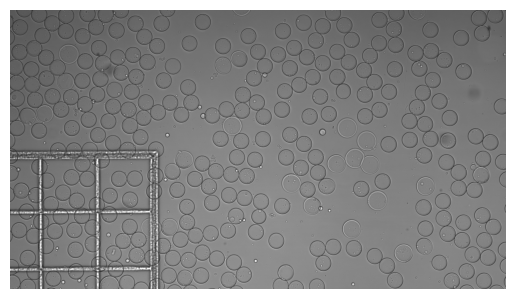

uint8
(1080, 1920, 3)


In [2]:
# Load the image from a file
test_image = cv2.imread('Raw_images/Validation/1.png')

# Display the image using matplotlib
plt.imshow(test_image)
plt.axis('off')  
plt.show()

print(test_image.dtype)
print(test_image.shape)

In [3]:
# Function that splits the image into tiles using a sliding window approach
def generate_and_save_tiles(folder_path, window_size=(320, 320), stride=220, output_dir="Tiles/Training"):
    # Create the output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Supported image extensions
    supported_extensions = (".jpg", ".jpeg", ".png", ".tiff")

    # Iterate through the images in the folder
    image_id = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(supported_extensions):
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)

            # Get the shape of the original image
            height, width, _ = image.shape

            # Calculate the number of rows and columns for the sliding window
            nrows = (height - window_size[0]) // stride + 1
            ncols = (width - window_size[1]) // stride + 1

            # Adjust the strides to make sure the last tiles fit exactly within the image dimensions
            last_row_stride = height - window_size[0] - (nrows - 1) * stride if nrows > 1 else 0
            last_col_stride = width - window_size[1] - (ncols - 1) * stride if ncols > 1 else 0

            # # Print the strides for the last row and column
            # print(f"Last row stride: {last_row_stride}")
            # print(f"Last column stride: {last_col_stride}")

            # Slide the window across the image
            tile_id = 0
            for i in range(nrows + 1):  # +1 to include the last partial tile
                for j in range(ncols + 1):  # +1 to include the last partial tile
                    if i == nrows:  # Adjust the last row
                        v_start = height - window_size[0]
                    else:
                        v_start = i * stride

                    if j == ncols:  # Adjust the last column
                        h_start = width - window_size[1]
                    else:
                        h_start = j * stride

                    h_end = h_start + window_size[1]
                    v_end = v_start + window_size[0]

                    # Crop the image using the calculated indices
                    cropped = image[v_start:v_end, h_start:h_end]

                    # Save the crop as PNG file
                    tile_filename = f"image_{image_id}_tile_{tile_id}.png"
                    tile_filepath = os.path.join(output_dir, tile_filename)
                    cv2.imwrite(tile_filepath, cropped)

                    tile_id += 1
            image_id += 1

In [4]:
tiles = generate_and_save_tiles("Raw_images/Training")